In [2]:
import matplotlib as plt

In [4]:
import matplotlib.pyplot as plt 

In [6]:
import pandas as pd

In [8]:
data=pd.read_csv('pizza_sales.csv')

In [10]:
print(data.head())

   pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1  2015-01-01   11:57:40   
2         3         2  five_cheese_l         1  2015-01-01   11:57:40   
3         4         2    ital_supr_l         1  2015-01-01   11:57:40   
4         5         2     mexicana_m         1  2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   


In [12]:
print(data.head(10))


   pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1  2015-01-01   11:57:40   
2         3         2  five_cheese_l         1  2015-01-01   11:57:40   
3         4         2    ital_supr_l         1  2015-01-01   11:57:40   
4         5         2     mexicana_m         1  2015-01-01   11:57:40   
5         6         2     thai_ckn_l         1  2015-01-01   11:57:40   
6         7         3    ital_supr_m         1  2015-01-01   12:12:28   
7         8         3   prsc_argla_l         1  2015-01-01   12:12:28   
8         9         4    ital_supr_m         1  2015-01-01   12:16:31   
9        10         5    ital_supr_m         1  2015-01-01   12:21:30   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50  

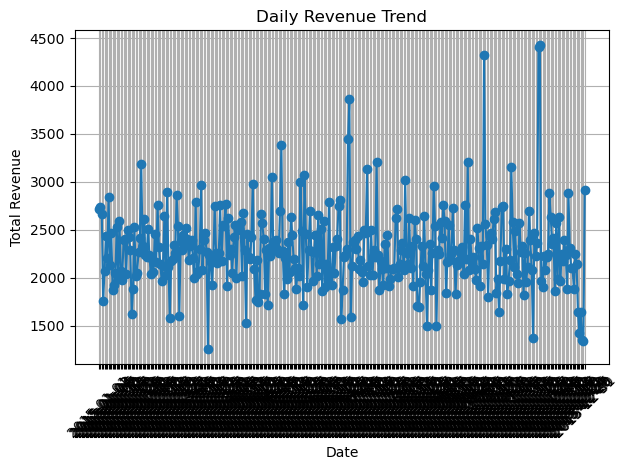

In [14]:
daily_revenue = data.groupby('order_date')['total_price'].sum()
plt.plot(daily_revenue.index, daily_revenue.values, marker='o')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
data['day_of_week'] = data['order_date'].dt.day_name()
orders_by_day = data.groupby('day_of_week')['order_id'].nunique().sort_index()
plt.bar(orders_by_day.index, orders_by_day.values, color='skyblue')
plt.title("Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

In [20]:
data['order_date'] = pd.to_datetime(data['order_date'])


In [22]:
data['day_of_week'] = pd.to_datetime(data['order_date']).dt.day_name()

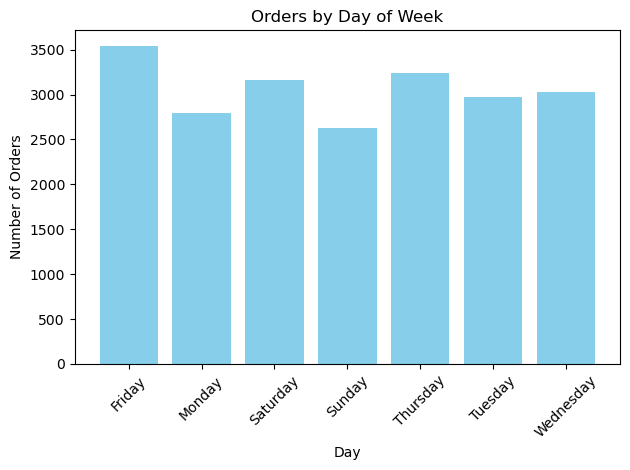

In [24]:
data['day_of_week'] = data['order_date'].dt.day_name()
orders_by_day = data.groupby('day_of_week')['order_id'].nunique().sort_index()
plt.bar(orders_by_day.index, orders_by_day.values, color='skyblue')
plt.title("Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


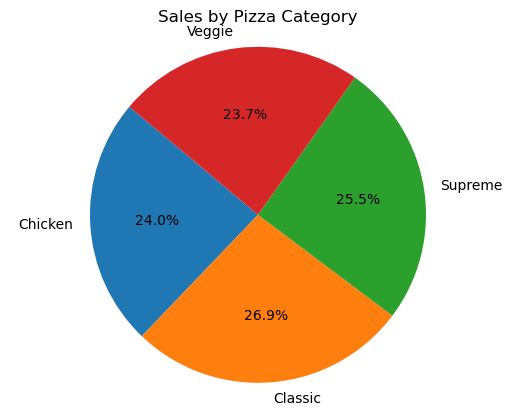

In [26]:
category_sales = data.groupby('pizza_category')['total_price'].sum()
plt.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales by Pizza Category")
plt.axis('equal')
plt.show()


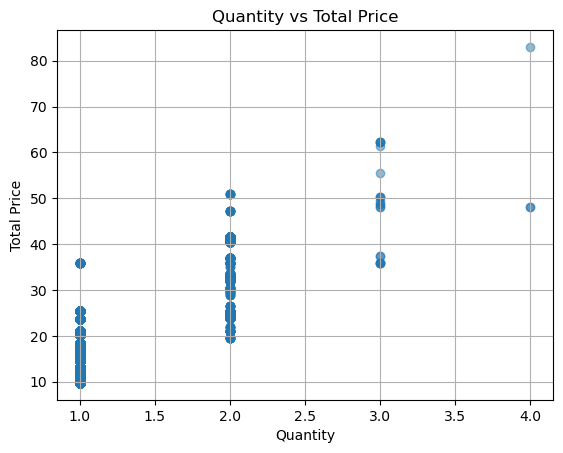

In [28]:
plt.scatter(data['quantity'], data['total_price'], alpha=0.5)
plt.title("Quantity vs Total Price")
plt.xlabel("Quantity")
plt.ylabel("Total Price")
plt.grid(True)
plt.show()


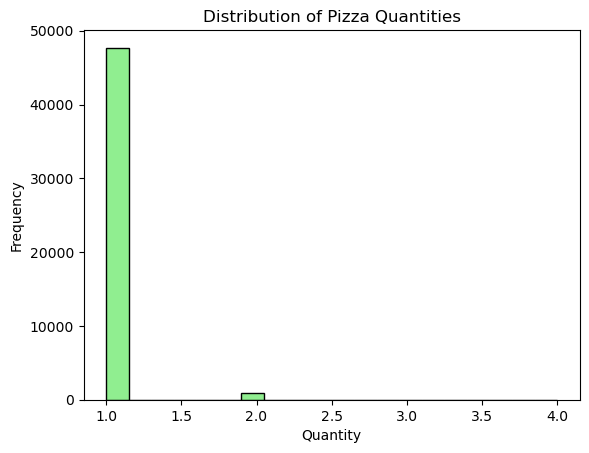

In [30]:
plt.hist(data['quantity'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Pizza Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


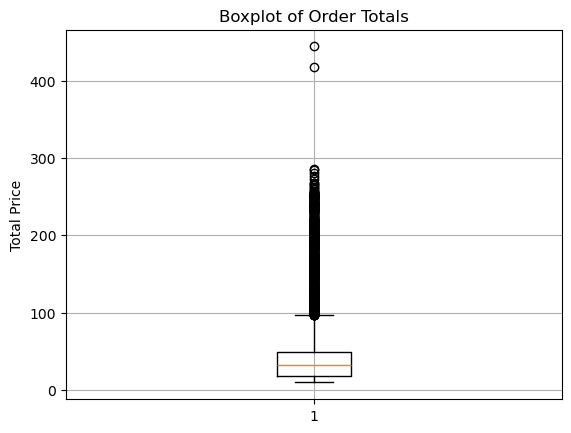

In [32]:
order_totals = data.groupby('order_id')['total_price'].sum()
plt.boxplot(order_totals)
plt.title("Boxplot of Order Totals")
plt.ylabel("Total Price")
plt.grid(True)
plt.show()


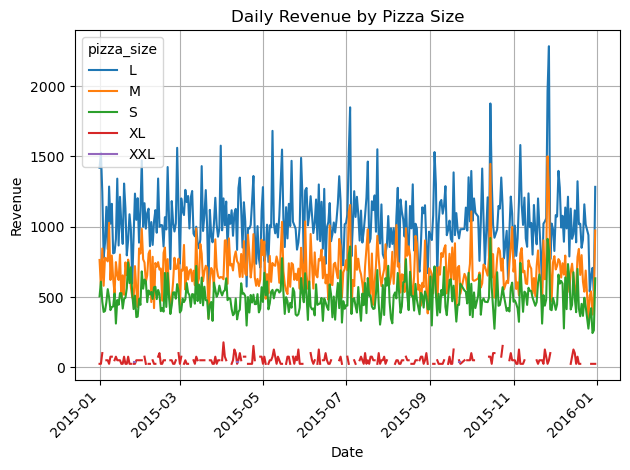

In [34]:
revenue_by_size = data.groupby(['order_date', 'pizza_size'])['total_price'].sum().unstack()
revenue_by_size.plot()
plt.title("Daily Revenue by Pizza Size")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
data.summarize()

AttributeError: 'DataFrame' object has no attribute 'summarize'

In [38]:
data.summarise()

AttributeError: 'DataFrame' object has no attribute 'summarise'

In [40]:
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S')
data['hour'] = data['order_time'].dt.hour
hourly_summary = data.groupby('hour')['total_price'].sum()


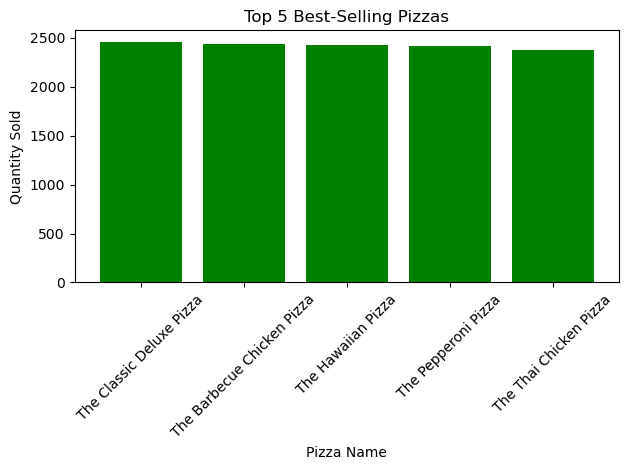

In [42]:
top_pizzas = data.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5)
plt.bar(top_pizzas.index, top_pizzas.values, color='green')
plt.title("Top 5 Best-Selling Pizzas")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


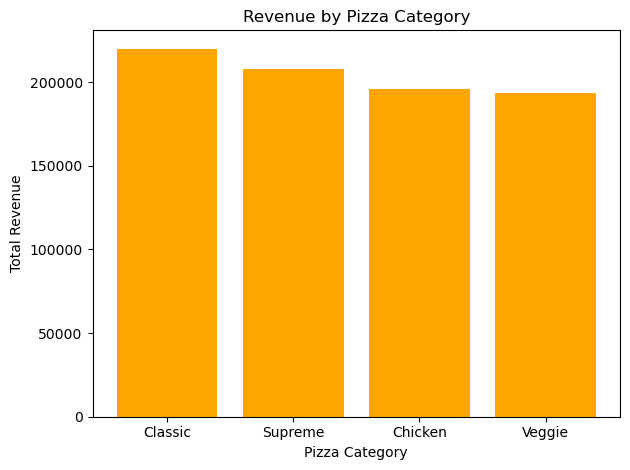

In [44]:
category_revenue = data.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)
plt.bar(category_revenue.index, category_revenue.values, color='orange')
plt.title("Revenue by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


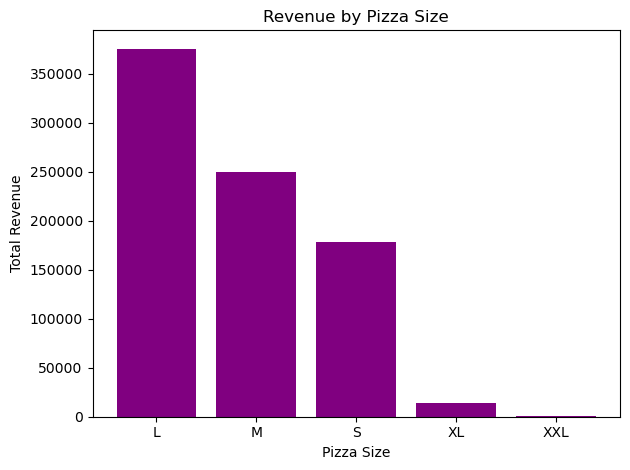

In [46]:
size_revenue = data.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)
plt.bar(size_revenue.index, size_revenue.values, color='purple')
plt.title("Revenue by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()
